# Wrangle Twitter Data
## Introduction
In this project data is gathered from three different sources: twitter data archive, udacity server, and twitter API. This gathered data is then merged together and accessed for cleaning. Necessary cleaning operations are performed. Finally exploratory data visualizations are produced to explore the cleaned data.
- [Gather Data](#Gather)
- [Access Data](#Access)
- [Clean Data](#Clean)
- [Exploratory Data Visualization](#Visualize)


In [394]:
#Import required libraries
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import re
import datetime as dt
import matplotlib.pyplot as plt
% matplotlib inline 

In [341]:
#To display full text of twitter text expand colwidth of jupyter notebook
pd.options.display.max_colwidth=150

<a id='Gather'></a>
### 1. Gather Data

Import twitter-archive-enhanced.csv data

In [342]:
#Import data from twitter-archive-enhanced.csv file
twitter_data=pd.read_csv('twitter-archive-enhanced.csv')
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


Import image_prediction.tsv file from udacity server using requests library

In [343]:
#Read file from udacity server using requests library
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r

<Response [200]>

In [344]:
#Download the server file and save in a folder named Server_file, if folder not present create folder
foldername='Server_file'
if not os.path.exists(foldername):
    os.makedirs(foldername)
with open(os.path.join(foldername,url.split('/')[-1]),mode='wb') as file:
    file.write(r.content)
    
#Print folder directory
os.listdir(foldername)

['image-predictions.tsv']

In [345]:
#Read the image-predictions.tsv file and save as a dataframe
server_data=pd.read_csv('./Server_file/image-predictions.tsv',delimiter='\t')
server_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Import retweet status data from twitter using tweepy api and access tokens

In [346]:
#Acces the twitter data using access token and credentials
access_token = 'My access token'
access_secret = 'My access secret'
consumer_key = 'My consumer key'
consumer_secret = 'My consumer secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [347]:
#Save the twitter_archive tweet id column as a list- id_of_tweet
id_of_tweet=twitter_data['tweet_id']

In [254]:
#Please wait processing of this block takes 5-10mins

#Using tweet_id from twitter_achive data find if the tweet is retweet or original tweet
status={}
for tweet_id in id_of_tweet:
    try:
        tweet = api.get_status(tweet_id)
        retweet_status=hasattr(tweet, 'retweeted_status')
        
        #Save information in data dictionary status where key is tweet id and value is status if it is retweet True, else False
        status[tweet_id]=retweet_status
    
    except tweepy.TweepError:
        status[tweet_id]="No data" 
        
print("Block processed")

Block processed


In [393]:
#print status dictionary
for x in list(status)[0:5]:
    print ("key {}, value {} ".format(x,  status[x]))

key 754874841593970688, value No data 
key 841680585030541313, value False 
key 666268910803644416, value No data 
key 675522403582218240, value No data 
key 879415818425184262, value False 


In [386]:
#Create a dataframe of the tweets and status dictionary
api_data=pd.DataFrame(list(status.items()),columns=['tweet_id','retweet_status'])
api_data.to_csv('tweet_json.txt', sep = " ")
api_data.head()

,tweet_id,retweet_status
0,754874841593970688,No data
1,841680585030541313,False
2,666268910803644416,No data
3,675522403582218240,No data
4,879415818425184262,False


<a id='Access'></a>
### 2. Access Data

In [350]:
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https:/...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https:/...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### Tidyness issues:
#### 1. The twitter_data dataframe 'text' column has three variables: tweet text, rating, and image url. Seperate these as individual columns
#### 2. Date and time are stored in single column. Seperate these two as individual columns- Date and Time

#### Quality issues:

#### 1. Merge twitter archive data and data collected from twitter api. Merge twitter_data and api_data dataframes on tweet_id column

#### 2. Merge combined_data dataframe (twitter achrive and api_data) with data gathered from udacity server (server_data dataframe)

#### 3. Select only required columns from combined_data dataframe that would be used for analysis, name this dataframe as data

#### 4. From data dataframe filter only those tweets that has images. That is select all the data for tweets who have image_url

#### 5. From data dataframe filter data whose tweets are original. That is, delete tweets that are re-tweets or whose data is not present

#### 6. Check if the and numerator and denominator rating are accurate in table. If not update ratings

#### 7.  Check if the twitter text ratings and given ratings in twitter-archive match. If not update the ratings

#### 8.  Delete missing values from data dataframe

#### 9. From p1, p2, p3 create one single column selecting from p1, p2, p3 whose corresponding p_conf  is highest

#### 10.  Remove unwanted columns:  p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog

<a id='Clean'></a>
### 3. Clean Data

### 3.1 Tidy Issues
#### 3.1.1. The twitter_data dataframe 'text' column has three variables: tweet text, rating, and image url. 

####   Separate these three variables as individual columns- text, text_rating, image_url

In [351]:
#Separate the variables into three independent lists
text=[]
number=[]
url=[]
for tweets in twitter_data['text']:
    t=re.sub(r"\d\S+","",tweets)
    text.append(t)
    n=[int(s) for s in re.findall(r'\b\d+\b',tweets)]
    number.append(n)
    u = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', tweets) 
    url.append(u)

In [352]:
#Add these lists to twitter_data dataframe as individual columns
twitter_data['text']=text
twitter_data['text_rating']=number
twitter_data['image_url']=url
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,text_rating,image_url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. https://t.co/MgUWQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,"[13, 10]",[https://t.co/MgUWQ76dJU]
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. https://t.co/",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,"[13, 10]",[https://t.co/0Xxu71qeIV]
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,"[12, 10]",[https://t.co/wUnZnhtVJB]
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. happens to the best of us https://t.co/tD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,"[13, 10]",[https://t.co/tD36da7qLQ]
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. #BarkWeek https://t.co...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,"[12, 10]",[https://t.co/AtUZn91f7f]


#### 3.1.2. The twitter_data 'timestamp' column has two variables in single column: date and time

#### Separate these two variables and save them as individual columns date and time in twitter_data

In [353]:
#Separate date and time as individual columns from timestamp column
date = pd.to_datetime(twitter_data['timestamp'], format="%Y-%m-%d  %H:%M:%S +0000")
twitter_data['date']= date.dt.date
twitter_data['time'] = date.dt.time
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,text_rating,image_url,date,time
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. https://t.co/MgUWQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,10,Phineas,None,None,None,None,"[13, 10]",[https://t.co/MgUWQ76dJU],2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. https://t.co/",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,10,Tilly,None,None,None,None,"[13, 10]",[https://t.co/0Xxu71qeIV],2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,10,Archie,None,None,None,None,"[12, 10]",[https://t.co/wUnZnhtVJB],2017-07-31,00:18:03
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. happens to the best of us https://t.co/tD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,10,Darla,None,None,None,None,"[13, 10]",[https://t.co/tD36da7qLQ],2017-07-30,15:58:51
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. #BarkWeek https://t.co...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,10,Franklin,None,None,None,None,"[12, 10]",[https://t.co/AtUZn91f7f],2017-07-29,16:00:24


### 3.2 Quality Issues

#### 3.2.1 Merge all data collected from different sources. Join all three data frames on tweet_id column

#### Merge twitter archive and api_data dataframes on tweet_id column

In [354]:
#Merge twitter archive and api_data dataframes
combined_data=twitter_data.join(api_data.set_index('tweet_id'),on='tweet_id',how='outer', lsuffix='_left', rsuffix='_right')
combined_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,doggo,floofer,pupper,puppo,text_rating,image_url,date,time,retweet_status
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. https://t.co/MgUWQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,Phineas,None,None,None,None,"[13, 10]",[https://t.co/MgUWQ76dJU],2017-08-01,16:23:56,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. https://t.co/",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Tilly,None,None,None,None,"[13, 10]",[https://t.co/0Xxu71qeIV],2017-08-01,00:17:27,False
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,Archie,None,None,None,None,"[12, 10]",[https://t.co/wUnZnhtVJB],2017-07-31,00:18:03,False
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. happens to the best of us https://t.co/tD,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,Darla,None,None,None,None,"[13, 10]",[https://t.co/tD36da7qLQ],2017-07-30,15:58:51,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. #BarkWeek https://t.co...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,Franklin,None,None,None,None,"[12, 10]",[https://t.co/AtUZn91f7f],2017-07-29,16:00:24,False


#### 3.2.2 Merge combined_data dataframe (twitter achrive and api_data) with data gathered from udacity server (server_data dataframe). 

#### Join these dataframes on tweet_id column

In [355]:
#Merging with image prediction dataframe
combined_data=combined_data.join(server_data.set_index('tweet_id'),on='tweet_id',how='outer', lsuffix='_left', rsuffix='_right')
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 33 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
text_rating                   23

#### 3.2.3 Select only required columns from combined_data dataframe that would be used for analysis

In [356]:
data=combined_data[['tweet_id','text','rating_numerator','rating_denominator','text_rating','image_url','date','time','retweet_status','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id              2356 non-null int64
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
text_rating           2356 non-null object
image_url             2356 non-null object
date                  2356 non-null object
time                  2356 non-null object
retweet_status        2356 non-null object
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
dtypes: float64(3), int64(3), object(12)
memory usage: 349.7+ KB


#### 3.2.4 From data dataframe filter only those tweets that has images. That is select all the data for tweets who have image_url

In [357]:
#Considering only those tweets who have image
data=data[data['image_url'].str.len()!=0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id              2250 non-null int64
text                  2250 non-null object
rating_numerator      2250 non-null int64
rating_denominator    2250 non-null int64
text_rating           2250 non-null object
image_url             2250 non-null object
date                  2250 non-null object
time                  2250 non-null object
retweet_status        2250 non-null object
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null object
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null object
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null object
dtypes: float64(3), int64(3), object(12)
memory usage: 334.0+ KB


#### 3.2.5 From data dataframe filter data whose tweets are original. That is, delete tweets that are re-tweets or whose data is not present

In [358]:
#Considering only original tweets, removing retweets
data=data[data['retweet_status']==False]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 1419
Data columns (total 18 columns):
tweet_id              703 non-null int64
text                  703 non-null object
rating_numerator      703 non-null int64
rating_denominator    703 non-null int64
text_rating           703 non-null object
image_url             703 non-null object
date                  703 non-null object
time                  703 non-null object
retweet_status        703 non-null object
p1                    663 non-null object
p1_conf               663 non-null float64
p1_dog                663 non-null object
p2                    663 non-null object
p2_conf               663 non-null float64
p2_dog                663 non-null object
p3                    663 non-null object
p3_conf               663 non-null float64
p3_dog                663 non-null object
dtypes: float64(3), int64(3), object(12)
memory usage: 104.4+ KB


#### 3.2.6 Check if the and numerator and denominator rating are accurate in table.

In [359]:
data.describe()

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf
count,7.030000e+02,703.000000,703.000000,663.000000,663.000000,6.630000e+02
mean,8.205419e+17,12.247511,10.081081,0.626090,0.137027,5.766397e-02
std,3.848947e+16,3.899546,2.265931,0.262020,0.103214,5.123156e-02
min,6.983421e+17,0.000000,7.000000,0.063152,0.000023,5.595040e-07
25%,7.877641e+17,11.000000,10.000000,0.395394,0.050679,1.246360e-02
50%,8.190064e+17,12.000000,10.000000,0.650814,0.119682,4.526270e-02
75%,8.509893e+17,13.000000,10.000000,0.868894,0.198923,9.093700e-02
max,8.924206e+17,84.000000,70.000000,0.999953,0.467678,2.476190e-01


rating_numerator min rating is 0 and max is 84

rating_denominator min rating is 7 and max is 70, whereas it should be 10

In [360]:
data=data[data['rating_numerator']<=15]
data=data[data['rating_denominator']==10]
data.describe()

,tweet_id,rating_numerator,rating_denominator,p1_conf,p2_conf,p3_conf
count,6.990000e+02,699.000000,699.0,659.000000,659.000000,6.590000e+02
mean,8.206646e+17,12.017167,10.0,0.625099,0.137502,5.775237e-02
std,3.854288e+16,1.308882,0.0,0.262094,0.103299,5.129722e-02
min,6.983421e+17,0.000000,10.0,0.063152,0.000023,5.595040e-07
25%,7.879251e+17,11.000000,10.0,0.394497,0.051360,1.246360e-02
50%,8.192277e+17,12.000000,10.0,0.650003,0.120184,4.544830e-02
75%,8.513449e+17,13.000000,10.0,0.864201,0.199342,9.093700e-02
max,8.924206e+17,14.000000,10.0,0.999953,0.467678,2.476190e-01


#### 3.2.7 Check if the twitter text ratings and given ratings in twitter-archive match. If not update the ratings

In [361]:
data=data[data['text_rating'].str.len()==2]
data.index=range(len(data.tweet_id))

In [362]:
data.shape

(682, 18)

In [363]:
for i in range(1,data.shape[0]):
    if data['text_rating'][i][0]!=data['rating_numerator'][i]:
        data.loc[i,'rating_numerator']=data['text_rating'][i][0]

#### 3.2.8 Delete missing values from dataframe

In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 0 to 681
Data columns (total 18 columns):
tweet_id              682 non-null int64
text                  682 non-null object
rating_numerator      682 non-null int64
rating_denominator    682 non-null int64
text_rating           682 non-null object
image_url             682 non-null object
date                  682 non-null object
time                  682 non-null object
retweet_status        682 non-null object
p1                    643 non-null object
p1_conf               643 non-null float64
p1_dog                643 non-null object
p2                    643 non-null object
p2_conf               643 non-null float64
p2_dog                643 non-null object
p3                    643 non-null object
p3_conf               643 non-null float64
p3_dog                643 non-null object
dtypes: float64(3), int64(3), object(12)
memory usage: 121.2+ KB


In [365]:
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 0 to 681
Data columns (total 18 columns):
tweet_id              643 non-null int64
text                  643 non-null object
rating_numerator      643 non-null int64
rating_denominator    643 non-null int64
text_rating           643 non-null object
image_url             643 non-null object
date                  643 non-null object
time                  643 non-null object
retweet_status        643 non-null object
p1                    643 non-null object
p1_conf               643 non-null float64
p1_dog                643 non-null object
p2                    643 non-null object
p2_conf               643 non-null float64
p2_dog                643 non-null object
p3                    643 non-null object
p3_conf               643 non-null float64
p3_dog                643 non-null object
dtypes: float64(3), int64(3), object(12)
memory usage: 95.4+ KB


#### 3.2.9 From p1, p2, p3 create one single column selecting from p1, p2, p3 whose corresponding p_conf  is highest

If Predicted dog breed is not a dog, that is, p1_dog=False, replace its corresponding p_conf value to zero. So we will only consider those results that are dogs

In [366]:
data.index=range(len(data.tweet_id))
for i in range(0,data.shape[0]):
    if data['p1_dog'][i]==False:
        data.loc[i,'p1_conf']=0
    if data['p2_dog'][i]==False:
        data.loc[i,'p2_conf']=0
    if data['p3_dog'][i]==False:
        data.loc[i,'p3_conf']=0       

Now compare p1_conf, p2_conf, and p3_conf. Find maximun p_conf value and store its corresponding breed name is dog list and corresponding p_conf value in p_conf list


In [367]:
dog=[]
p_conf=[]
dog_type=[]
for i in range(0,data.shape[0]):
    if ((data['p1_conf'][i]>data['p2_conf'][i])&(data['p1_conf'][i]>data['p3_conf'][i])):
        p=data['p1_conf'][i]
        breed=data['p1'][i]
        types=data['p1_dog'][i]
    elif ((data['p2_conf'][i]>data['p1_conf'][i])&(data['p2_conf'][i]>data['p3_conf'][i])):
        p=data['p2_conf'][i]
        breed=data['p2'][i]
        types=data['p2_dog'][i]
    elif ((data['p3_conf'][i]>data['p2_conf'][i])&(data['p3_conf'][i]>data['p1_conf'][i])):
        p=data['p3_conf'][i]
        breed=data['p3'][i]
        types=data['p3_dog'][i]
    dog.append(breed)
    p_conf.append(p)
    dog_type.append(types)

Add dog and p_conf table to the dataframe

In [368]:
data['dog_type']=dog
data['p_conf']=p_conf
data['is_dog']=dog_type
data.head()

,tweet_id,text,rating_numerator,rating_denominator,text_rating,image_url,date,time,retweet_status,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,p_conf,is_dog
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. https://t.co/MgUWQ,13,10,"[13, 10]",[https://t.co/MgUWQ76dJU],2017-08-01,16:23:56,False,orange,...,False,bagel,0.000000,False,banana,0.000000,False,boxer,0.883048,True
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. https://t.co/",13,10,"[13, 10]",[https://t.co/0Xxu71qeIV],2017-08-01,00:17:27,False,Chihuahua,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Chihuahua,0.323581,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. https://t.co/wUnZnhtVJB,12,10,"[12, 10]",[https://t.co/wUnZnhtVJB],2017-07-31,00:18:03,False,Chihuahua,...,True,malamute,0.078253,True,kelpie,0.031379,True,Chihuahua,0.716012,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal. happens to the best of us https://t.co/tD,13,10,"[13, 10]",[https://t.co/tD36da7qLQ],2017-07-30,15:58:51,False,paper_towel,...,False,Labrador_retriever,0.168086,True,spatula,0.000000,False,Labrador_retriever,0.168086,True
4,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. #BarkWeek https://t.co...",12,10,"[12, 10]",[https://t.co/AtUZn91f7f],2017-07-29,16:00:24,False,basset,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,basset,0.555712,True


In [369]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 0 to 642
Data columns (total 21 columns):
tweet_id              643 non-null int64
text                  643 non-null object
rating_numerator      643 non-null int64
rating_denominator    643 non-null int64
text_rating           643 non-null object
image_url             643 non-null object
date                  643 non-null object
time                  643 non-null object
retweet_status        643 non-null object
p1                    643 non-null object
p1_conf               643 non-null float64
p1_dog                643 non-null object
p2                    643 non-null object
p2_conf               643 non-null float64
p2_dog                643 non-null object
p3                    643 non-null object
p3_conf               643 non-null float64
p3_dog                643 non-null object
dog_type              643 non-null object
p_conf                643 non-null float64
is_dog                643 non-null bool
dtypes: bool(1

#### 3.2.10 Remove unwanted columns: p1, p2, p3 is converted to dog_type; Remove p1, p2, p3

#### p1_conf,p2_conf,p3_conf is converted p_conf; remove  p1_conf,p2_conf,p3_conf

#### Remove  p1_dog, p2_dog, p3_dog

In [387]:
data=data[['tweet_id','text','rating_numerator','rating_denominator','image_url','date','time','retweet_status','dog_type','p_conf','is_dog']]
data.to_csv('twitter_archive_master.csv', sep = ",")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 643 entries, 0 to 642
Data columns (total 11 columns):
tweet_id              643 non-null int64
text                  643 non-null object
rating_numerator      643 non-null int64
rating_denominator    643 non-null int64
image_url             643 non-null object
date                  643 non-null object
time                  643 non-null object
retweet_status        643 non-null object
dog_type              643 non-null object
p_conf                643 non-null float64
is_dog                643 non-null bool
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 75.9+ KB


<a id='Visualize'></a>
### 4. Exploratory Data Visualization

A box plot to observe the minimum, maximum and mean ratings for all dogs. As can be seen mean rating is 12

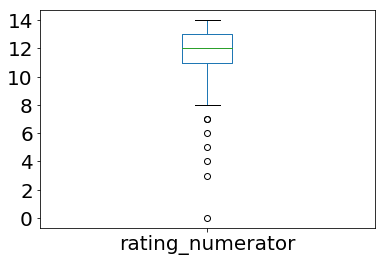

In [371]:
data.plot(y='rating_numerator',kind='box',fontsize=20);

Group data by dog type and count the number of dogs in each type

In [372]:
groupby_dog_count=data.groupby(['dog_type'])['tweet_id'].count()
groupby_dog_count.sort_values(ascending=False,inplace=True)

Bar plot to visualize the dog breed and its corresponding count of dogs

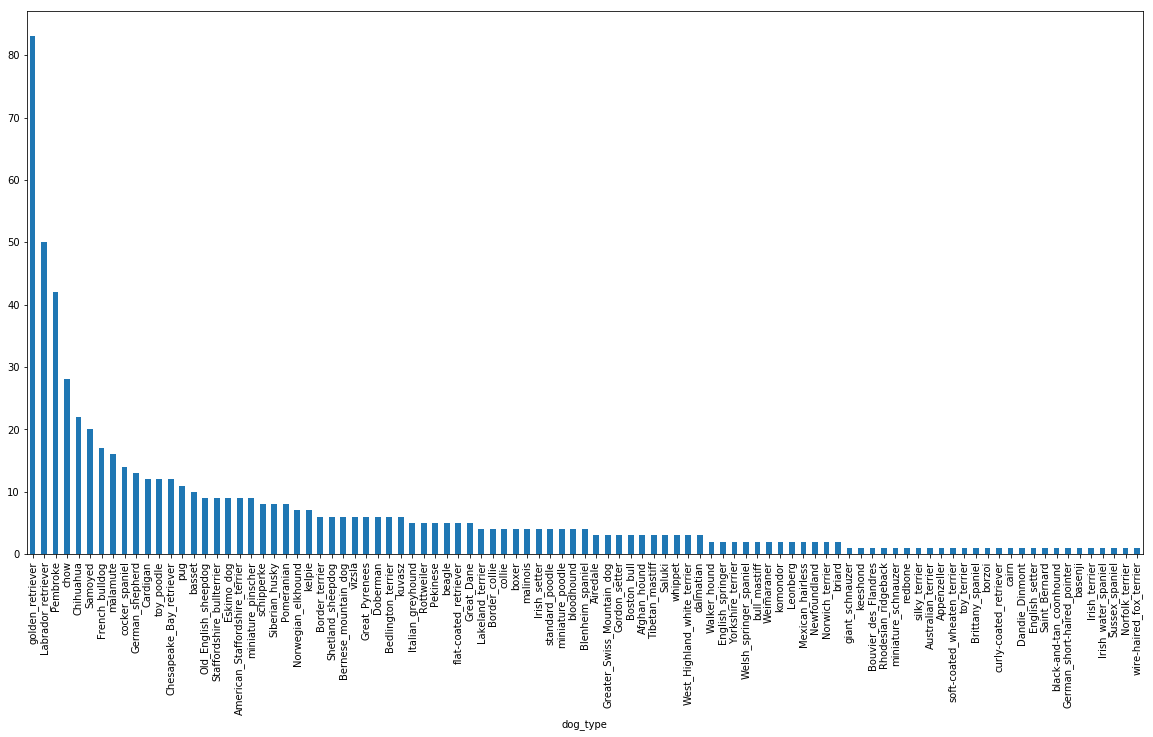

In [373]:
plt.rcParams["figure.figsize"] = (20,10)
groupby_dog_count.plot(x=groupby_dog_count.index,y=groupby_dog_count,kind='bar');

To see top 10 dog breed with highest count. As can be seen golden_retrriever has highest count of dogs

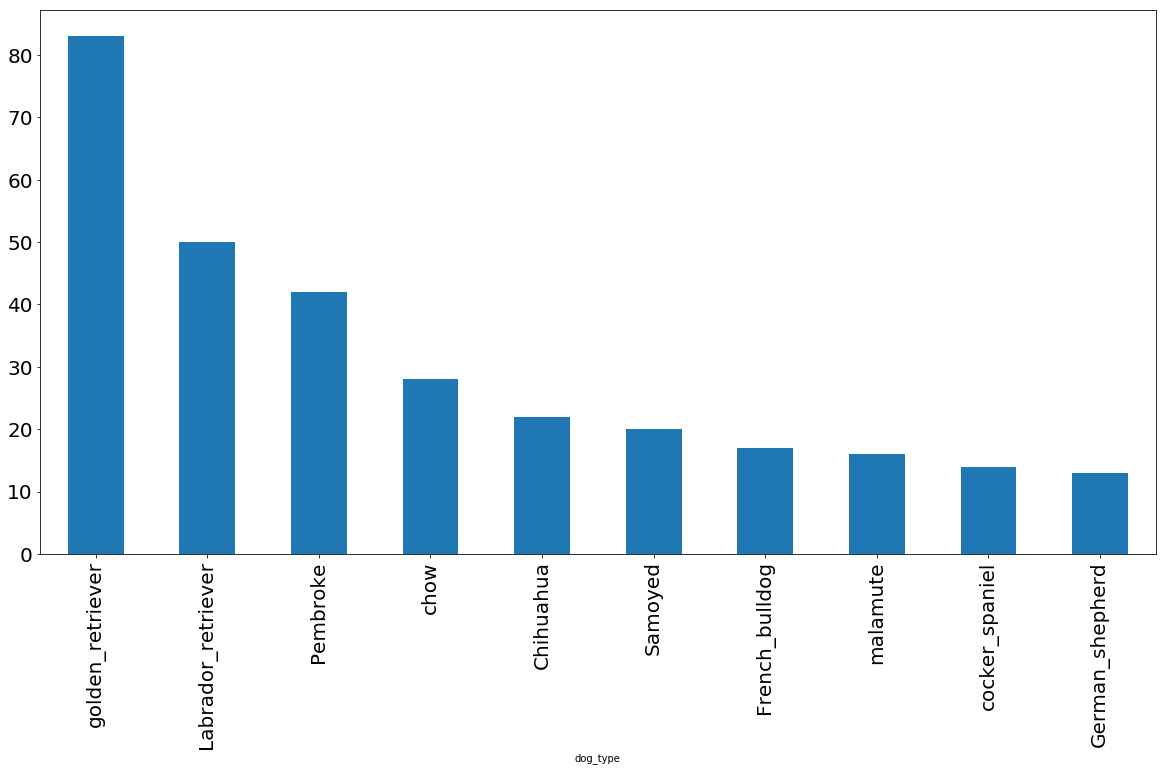

In [374]:
groupby_dog_count[:10].plot(x=groupby_dog_count.index,y=groupby_dog_count,kind='bar',fontsize=20);

Group the data by dog breed and sum its corresponding rating

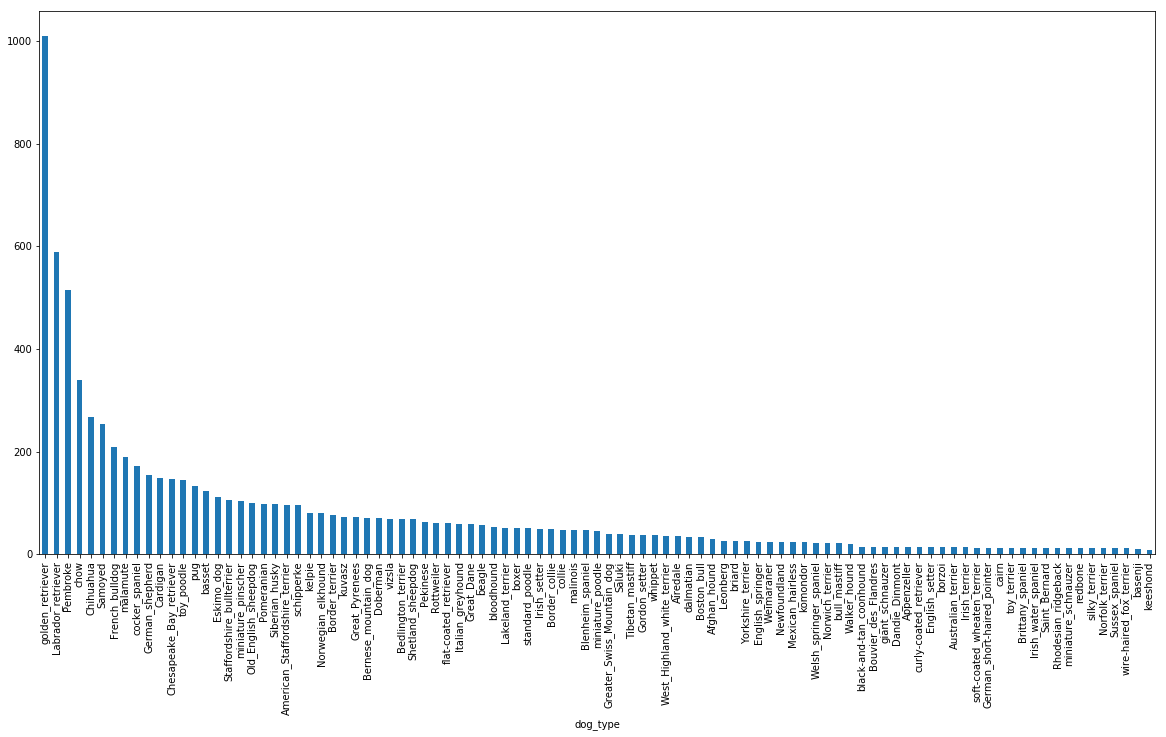

In [375]:
groupby_dog_sum_rating=data.groupby(['dog_type'])['rating_numerator'].sum()
groupby_dog_sum_rating.sort_values(ascending=False,inplace=True)
groupby_dog_sum_rating.plot(x=groupby_dog_sum_rating.index,y=groupby_dog_sum_rating,kind='bar');

Pie chart to visualize top 10 highest rated dogs. As can be seen golden_retriever has highest rating

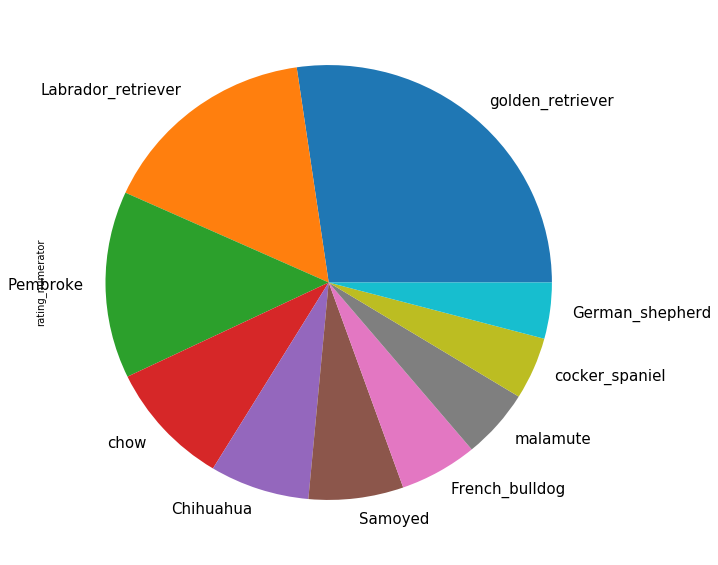

In [376]:
groupby_dog_sum_rating[:10].plot(x=groupby_dog_sum_rating.index,y=groupby_dog_sum_rating,kind='pie',figsize=[10,10],fontsize=15);

A scatter plot to see the relationship betwwen Dog rating and Count varibles. As can be seen there is a strong positive relationship. As the count increases so does the sum of dog ratings.

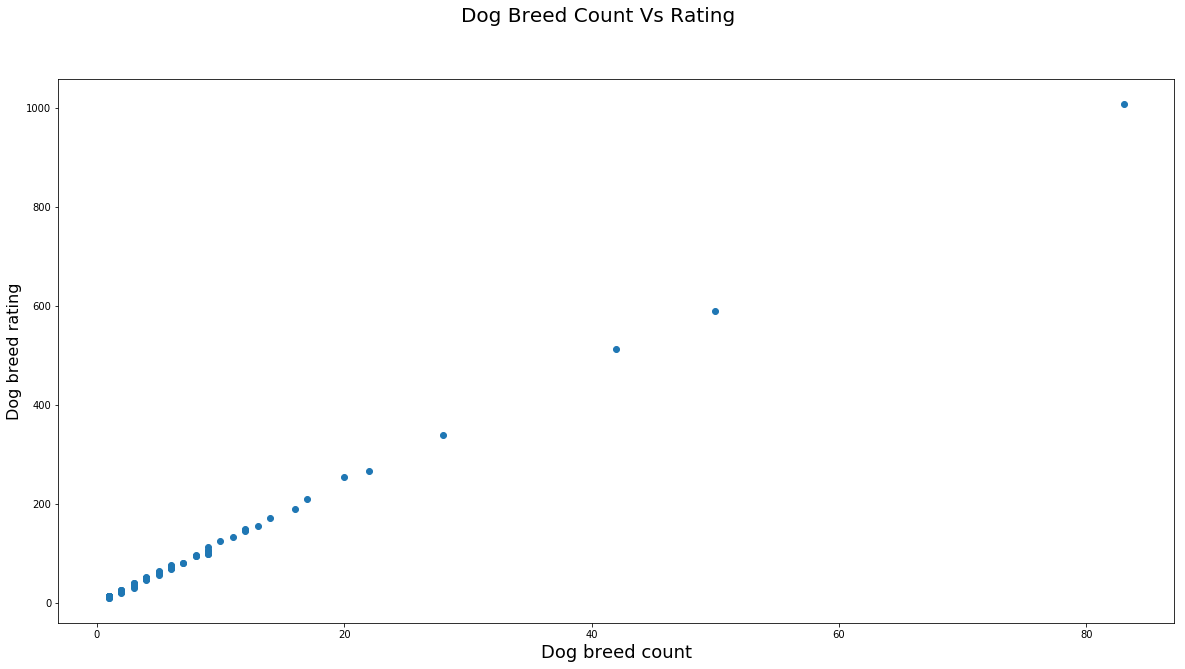

In [377]:
plt.scatter(groupby_dog_count,groupby_dog_sum_rating)
plt.suptitle('Dog Breed Count Vs Rating', fontsize=20)
plt.xlabel('Dog breed count', fontsize=18)
plt.ylabel('Dog breed rating', fontsize=16);

As there is positive relationship between count and sum rating, we should consider mean rating. 
Group data by dog type and take mean of its corresponding ratings

In [378]:
groupby_dog_mean_rating=data.groupby(['dog_type'])['rating_numerator'].mean()
groupby_dog_mean_rating.sort_values(ascending=False,inplace=True)

A bar chart to visualize all mean ratings for all dog types

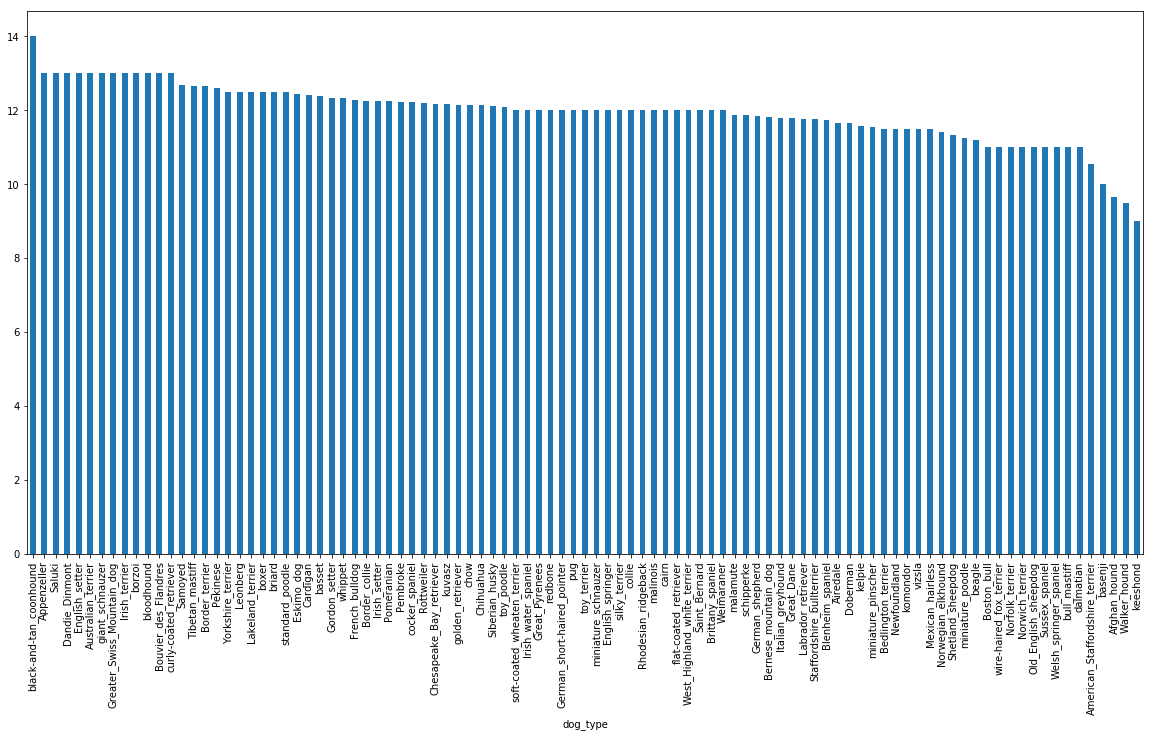

In [379]:
groupby_dog_mean_rating.plot(x=groupby_dog_mean_rating.index,y=groupby_dog_mean_rating,kind='bar');

Bar chart to visualize top 10 highest mean rated dog types

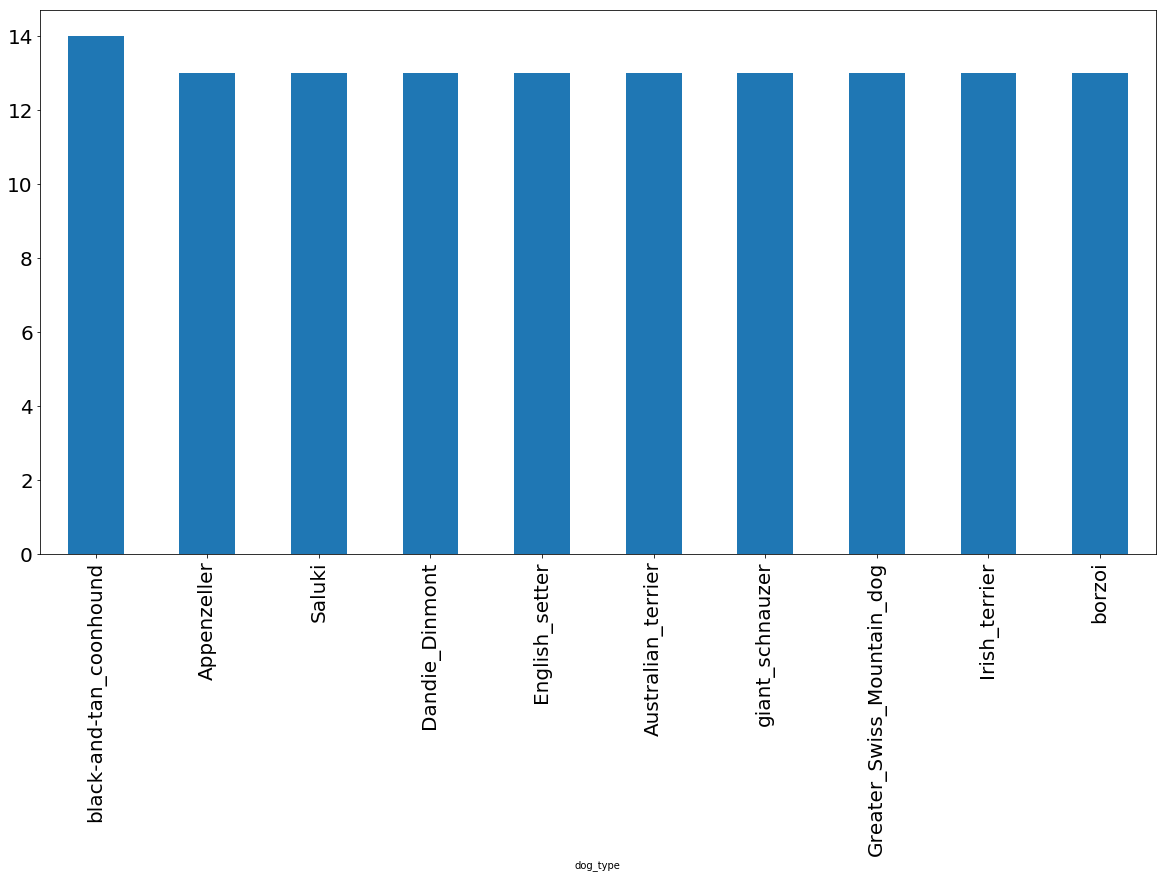

In [380]:
groupby_dog_mean_rating[:10].plot(x=groupby_dog_mean_rating.index,y=groupby_dog_mean_rating,kind='bar',fontsize=20);

Bar chart to visualize least 10 mean rated dog types

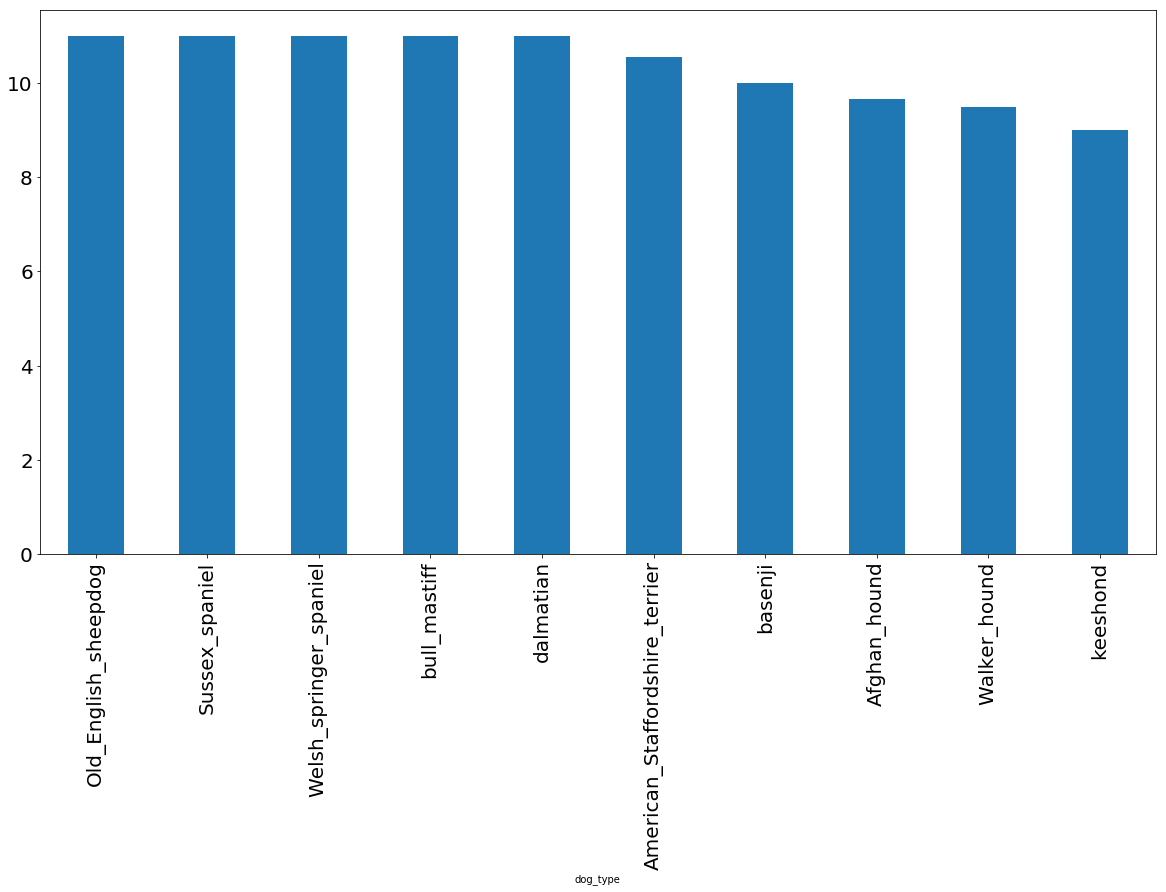

In [381]:
groupby_dog_mean_rating[-10:].plot(x=groupby_dog_mean_rating.index,y=groupby_dog_mean_rating,kind='bar',fontsize=20);

A boxplot to visualize the minimum mean, maximum mean and average mean rating for dog type

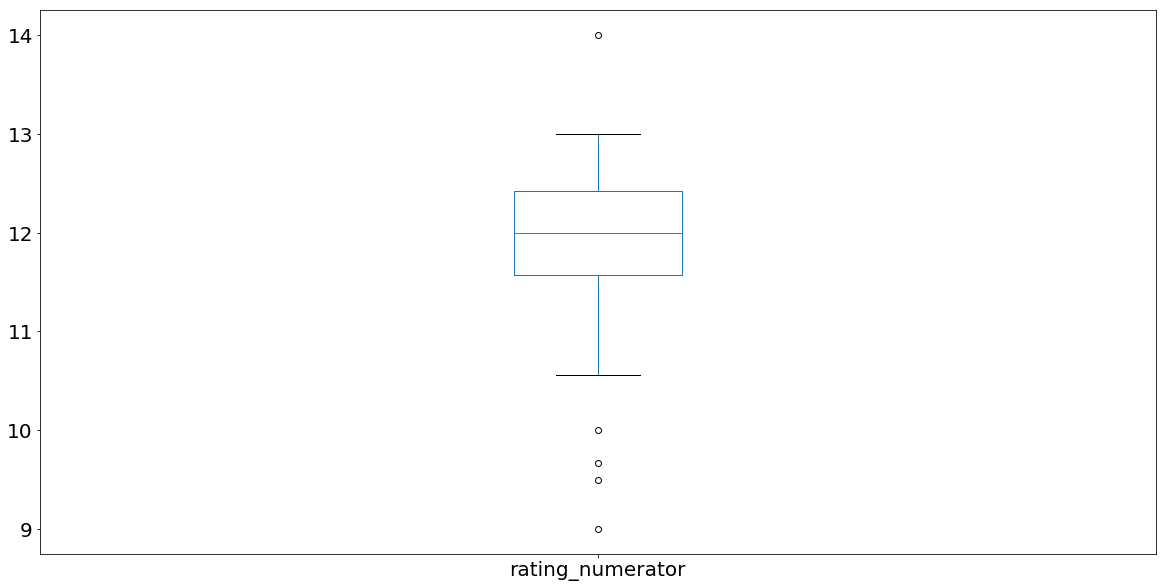

In [382]:
groupby_dog_mean_rating.plot(y=groupby_dog_mean_rating,kind='box',fontsize=20);

A scatter plot to visualize the relationship between mean rating and dog type count

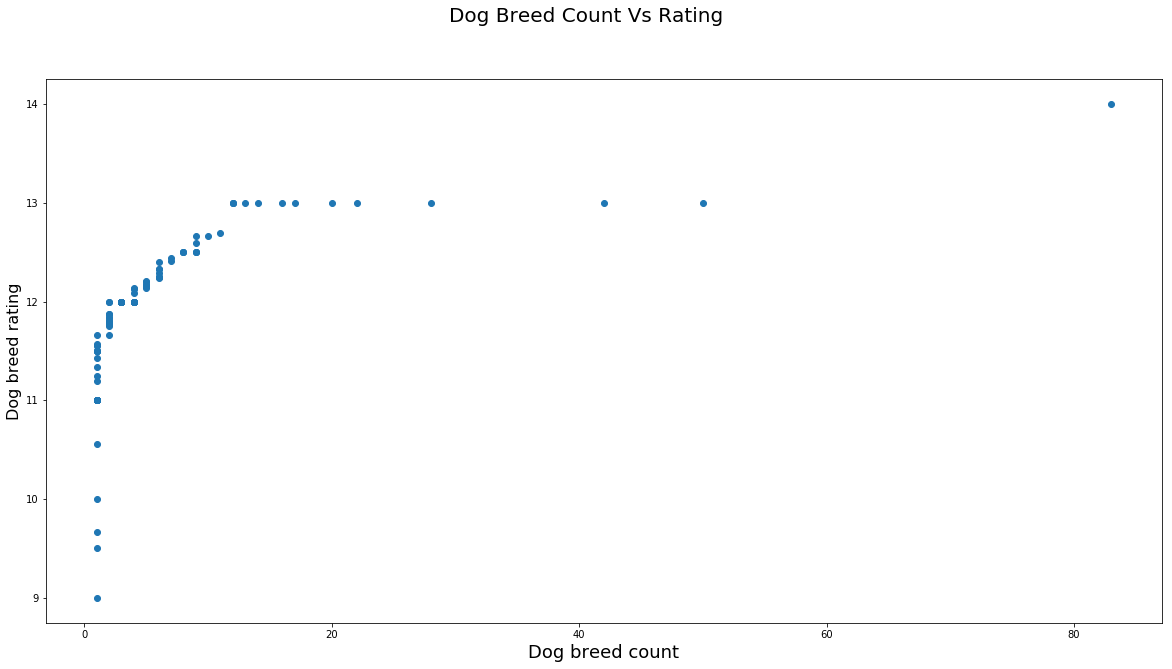

In [383]:
plt.scatter(groupby_dog_count,groupby_dog_mean_rating)
plt.suptitle('Dog Breed Count Vs Rating', fontsize=20)
plt.xlabel('Dog breed count', fontsize=18)
plt.ylabel('Dog breed rating', fontsize=16);